In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Using accept-reject

In [2]:
dls = [2, 5, 10, 11, 12, 13, 14, 15]
npts = [100, 1000, 10000]
NPOINTS = 100

In [3]:
total_iter = np.zeros(len(dls))

In [4]:
for idx, d in enumerate(dls):
    count = 0
    while count != NPOINTS:
        x = np.random.uniform(low = -1.0, high = 1.0, size = d)
        if np.linalg.norm(x) < 1:
            count = count +1
        total_iter[idx] += 1
    print("Points generated for d = ", d)

Points generated for d =  2
Points generated for d =  5
Points generated for d =  10
Points generated for d =  11
Points generated for d =  12
Points generated for d =  13
Points generated for d =  14
Points generated for d =  15


In [35]:
x = total_iter/NPOINTS
for i, d in zip(x, dls):
    print (d, ' & ',i )

2  &  1.4
5  &  7.54
10  &  384.1
11  &  1189.32
12  &  3662.61
13  &  9276.96
14  &  27464.29
15  &  98154.31


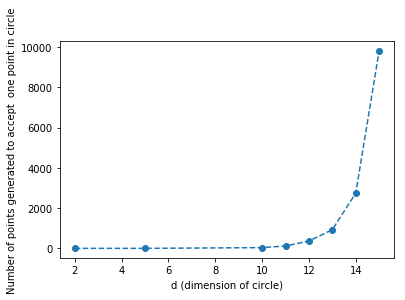

In [32]:
plt.plot(dls, total_iter/(10*NPOINTS), 'o--')
plt.xlabel('d (dimension of circle)')
plt.ylabel('Number of points generated to accept  one point in circle')
plt.savefig('Image-Q3/acept-reject.png')

## MCMC

In [75]:
dls = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45,  50]
npts = [100, 1000, 10000]
NPOINTS = 100

In [38]:
def identity(x):
    if np.linalg.norm(x) < 1:
        return 1
    else:
        return 0

In [46]:
def compute_alpha(w, x):
    if identity(w) == 0:
        return 0
    else:
        return 1

In [49]:
def generate_w(xold, d):
    w = np.zeros(d)
    for idx in range(d):
        w[idx] = np.random.uniform(low = xold[idx] - 0.2, high = xold[idx] + 0.2, size = 1)
    return w

In [71]:
total_iter = np.zeros(len(dls))
for idx, d in enumerate(dls):
    count = 0
    xold = np.zeros(d)
    while count != NPOINTS:
        w = generate_w(xold, d)
        alpha = compute_alpha(w, x)
        u = np.random.uniform(size = 1)
        if u < alpha:
            xold = w
            count = count +1
        total_iter[idx] += 1
    print("Points generated for d = ", d)

Points generated for d =  2
Points generated for d =  5
Points generated for d =  10
Points generated for d =  15
Points generated for d =  20
Points generated for d =  25
Points generated for d =  30
Points generated for d =  35
Points generated for d =  40
Points generated for d =  45
Points generated for d =  50


In [77]:
x = total_iter/NPOINTS
for i, d in zip(x, dls):
    print (d, ' & ',i )

2  &  1.14
5  &  1.28
10  &  1.72
15  &  2.76
20  &  3.89
25  &  6.85
30  &  15.45
35  &  26.72
40  &  54.77
45  &  107.71
50  &  363.42


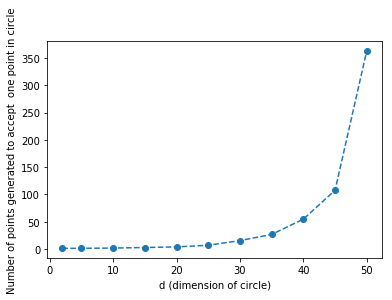

In [76]:
plt.plot(dls, total_iter/(NPOINTS), 'o--')
plt.xlabel('d (dimension of circle)')
plt.ylabel('Number of points generated to accept  one point in circle')
plt.savefig('Image-Q3/mcmc.png')

## Using Spherical Symmetry

In [1]:
dls = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45,  50]
npts = [100, 1000, 10000]
NPOINTS = 100

In [3]:
def normal_box_muller(n):
    a = np.zeros((2, n))
    u1 = np.random.uniform(size=n)
    u2 = np.random.uniform(size=n)
    a[0] = np.sqrt(-2*np.log(u1))* np.cos(2*np.pi*u2)
    a[1] = np.sqrt(-2*np.log(u1))* np.sin(2*np.pi*u2)
    return a[0]

In [5]:
total_iter = np.zeros(len(dls))
for idx, d in enumerate(dls):
    count = 0
    while count != NPOINTS:
        u = np.random.uniform(size = 1)
        r = u**(1.0/d)
        x = normal_box_muller(d)
        y = r*x/np.linalg.norm(x)
        if np.linalg.norm(y) >1:
            print("Wrong point generated")
        count = count +1
        total_iter[idx] += 1
    print("Points generated for d = ", d)

Points generated for d =  2
Points generated for d =  5
Points generated for d =  10
Points generated for d =  15
Points generated for d =  20
Points generated for d =  25
Points generated for d =  30
Points generated for d =  35
Points generated for d =  40
Points generated for d =  45
Points generated for d =  50


In [6]:
x = total_iter/NPOINTS
for i, d in zip(x, dls):
    print (d, ' & ',i )

2  &  1.0
5  &  1.0
10  &  1.0
15  &  1.0
20  &  1.0
25  &  1.0
30  &  1.0
35  &  1.0
40  &  1.0
45  &  1.0
50  &  1.0


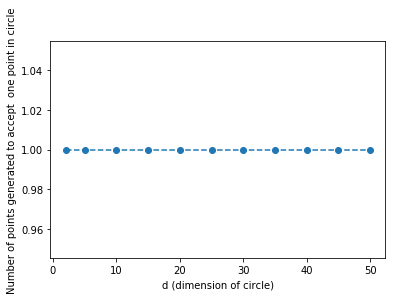

In [7]:
plt.plot(dls, total_iter/(NPOINTS), 'o--')
plt.xlabel('d (dimension of circle)')
plt.ylabel('Number of points generated to accept  one point in circle')
plt.savefig('Image-Q3/spherical.png')